In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import  numpy as np

In [78]:
df = pd.read_csv("placement.csv");

In [79]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package(in lpa)')

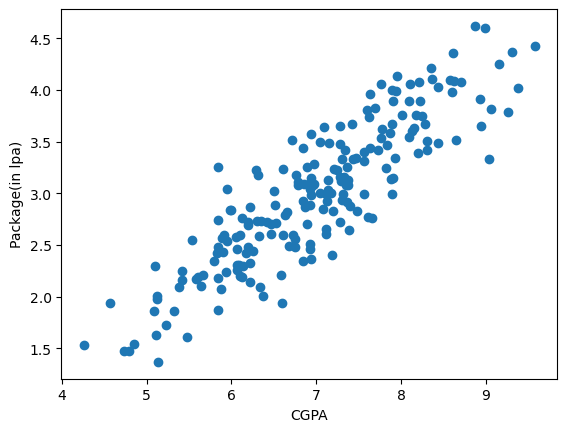

In [80]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [81]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [82]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [88]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [89]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'Package(in lpa)')

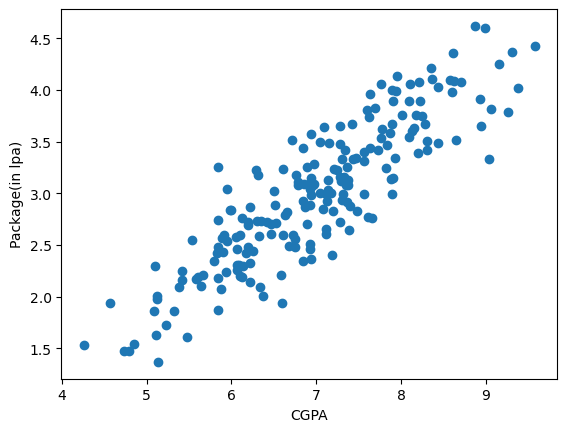

In [90]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

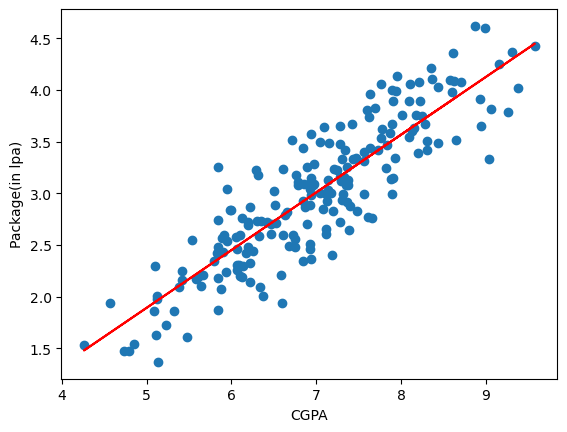

In [91]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.plot(X_train, lr.predict(X_train),color="red")

In [92]:
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

### Mean Absolute Error

In [93]:
from sklearn.metrics import mean_absolute_error

("MAE:",mean_absolute_error(y_test,y_pred))

('MAE:', 0.2884710931878175)

### mean squared error

In [94]:
from sklearn.metrics import mean_squared_error

print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.12129235313495527


### root mean squared error

In [95]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.34827051717731616


### r2 score

In [96]:
from sklearn.metrics import r2_score

print("R2Score:",r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)

R2Score: 0.780730147510384


### adjusted r2 score

In [97]:
X_test.shape

(40, 1)

In [98]:
n = X_test.shape[0]
k = X_test.shape[1]

In [99]:
1 - (((1- r2)*(n-1))/(n-1-k))

0.7749598882343415

# After Non-Effective column add

In [100]:
new_df = df.copy()

new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df

,cgpa,random_feature,package
0,6.89,0.270893,3.26
1,5.12,0.352174,1.98
2,7.82,0.617407,3.25
3,7.42,0.350192,3.67
4,6.94,0.799818,3.57
...,...,...,...
195,6.93,0.209152,2.46
196,5.89,0.193191,2.57
197,7.21,0.765646,3.24
198,7.63,0.237692,3.96


Text(0, 0.5, 'Package(in lpa)')

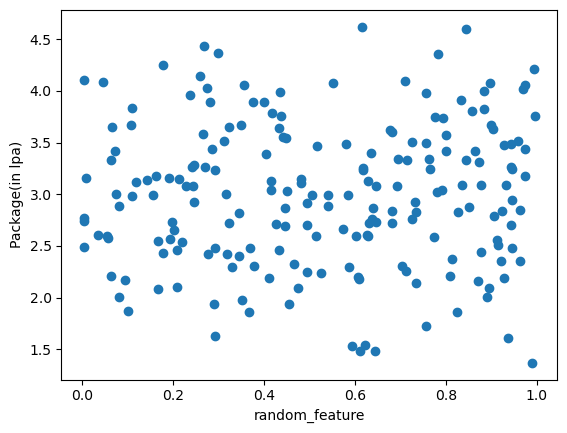

In [101]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [102]:
X = new_df.iloc[:, 0:2]
y = new_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [103]:
# r2 score
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7792038625584577


In [104]:
# adj r2 score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7672689362102663

# # After Effective column add

In [105]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [106]:
new_df2

,cgpa,iq,package
0,6.89,2.96,3.26
1,5.12,2.78,1.98
2,7.82,3.15,3.25
3,7.42,3.17,3.67
4,6.94,3.77,3.57
...,...,...,...
195,6.93,3.06,2.46
196,5.89,1.87,2.57
197,7.21,3.64,3.24
198,7.63,3.66,3.96


In [107]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [108]:
# r2 score
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.7792038625584577


In [109]:
#adj r2 score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7672689362102663